In [110]:
import numpy as np
import pandas as pd
from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'




### Data fields
Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

In [2]:
train_df = pd.read_csv(TRAIN_DATASET_PATH )
train_df.head(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630


In [3]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [4]:
test_df = pd.read_csv(TEST_DATASET_PATH )
test_df.head(4)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B


In [5]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [6]:
train_df.shape, test_df.shape


((10000, 20), (5000, 19))

In [7]:
train_df.columns , test_df.columns

(Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
        'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
        'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
        'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
       dtype='object'),
 Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
        'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
        'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
        'Helthcare_2', 'Shops_1', 'Shops_2'],
       dtype='object'))

In [8]:
train_df.dtypes , test_df.dtypes

(Id                 int64
 DistrictId         int64
 Rooms            float64
 Square           float64
 LifeSquare       float64
 KitchenSquare    float64
 Floor              int64
 HouseFloor       float64
 HouseYear          int64
 Ecology_1        float64
 Ecology_2         object
 Ecology_3         object
 Social_1           int64
 Social_2           int64
 Social_3           int64
 Healthcare_1     float64
 Helthcare_2        int64
 Shops_1            int64
 Shops_2           object
 Price            float64
 dtype: object,
 Id                 int64
 DistrictId         int64
 Rooms            float64
 Square           float64
 LifeSquare       float64
 KitchenSquare    float64
 Floor              int64
 HouseFloor       float64
 HouseYear          int64
 Ecology_1        float64
 Ecology_2         object
 Ecology_3         object
 Social_1           int64
 Social_2           int64
 Social_3           int64
 Healthcare_1     float64
 Helthcare_2        int64
 Shops_1            in

In [9]:
train_df.info() , test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

(None, None)

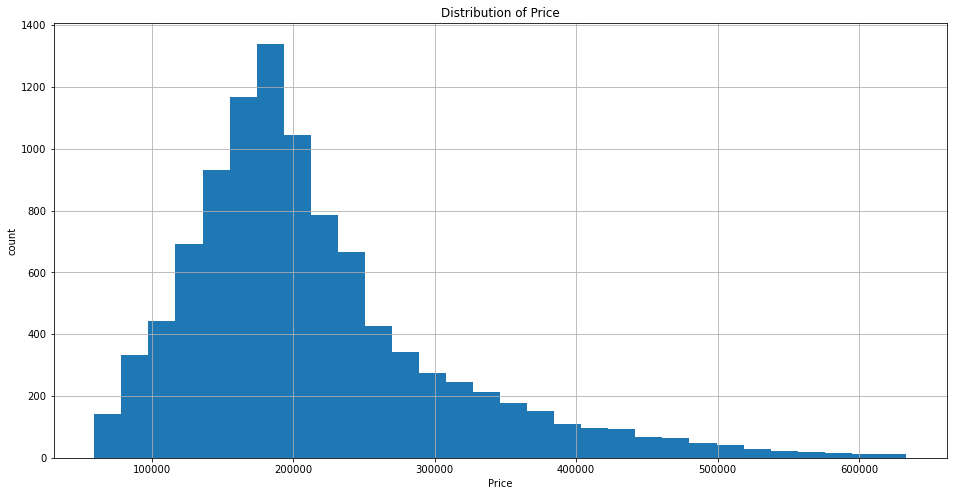

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('Price')

plt.title('Distribution of Price')
plt.show()

In [11]:
# Замена категориальных признаков на цифровые
train_df_obj_features = train_df.select_dtypes(include='object')
train_df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [12]:
train_df_obj_features['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [13]:
train_df_obj_features['Ecology_3'].value_counts()


B    9725
A     275
Name: Ecology_3, dtype: int64

In [14]:
train_df_obj_features['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [15]:
train_df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [16]:
train_df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [17]:
train_df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [18]:
train_df['Shops_2'].nunique()

2

In [19]:
train_df.replace(
    {'Ecology_2':
     {'A': 0, 'B': 1}, 
     'Ecology_3':
     {'A': 0, 'B': 1},
     'Shops_2':
     {'A': 0, 'B': 1},
    },
    inplace=True)
test_df.replace(
    {'Ecology_2':
     {'A': 0, 'B': 1}, 
     'Ecology_3':
     {'A': 0, 'B': 1},
     'Shops_2':
     {'A': 0, 'B': 1},
    },
    inplace=True)


In [20]:
# Замена пропусков
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [21]:
train_df['LifeSquare_nan']=0
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,1,11,3097,0,NaN,0,0,1,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,30,6207,1,1183.0,1,0,1,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,33,5261,0,240.0,3,1,1,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,1,33,8667,2,NaN,0,6,1,343995.102962,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,1,52,10311,6,NaN,1,9,1,119367.455796,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,1,2,629,1,NaN,0,0,0,199715.148807,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,1,20,4386,14,NaN,1,5,1,165953.912580,0
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,1,47,8004,3,125.0,3,5,1,171842.411855,0


In [22]:
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare_nan']=1
test_df['LifeSquare_nan']=0
test_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare_nan']=1

In [23]:
train_df[train_df['LifeSquare_nan']==1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,1,11,3097,0,NaN,0,0,1,305018.871089,1
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,168106.007630,1
18,4581,1,1.0,47.582480,NaN,1.0,16,16.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,128803.593810,1
20,8768,63,1.0,50.974891,NaN,1.0,7,16.0,2018,0.238617,...,1,26,3889,6,705.0,3,6,1,260328.413376,1
24,4717,27,1.0,44.203947,NaN,0.0,2,0.0,1977,0.072158,...,1,2,629,1,NaN,0,0,0,135466.559958,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,4944,6,2.0,52.573133,NaN,1.0,18,17.0,1977,0.243205,...,1,5,1564,0,540.0,0,0,1,154366.031184,1
9978,4851,1,1.0,39.314342,NaN,1.0,13,17.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,137782.941940,1
9981,6753,62,2.0,73.092686,NaN,1.0,4,16.0,2017,0.072158,...,1,2,629,1,NaN,0,0,0,159077.198056,1
9983,647,1,2.0,63.324025,NaN,1.0,4,17.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,183809.327114,1


In [24]:
# Заполняем пропуски в жилой площади медианой
median_LifeSquare = train_df['LifeSquare'].median()
median_LifeSquare 

32.781260192155735

In [25]:
train_df['LifeSquare'].fillna(median_LifeSquare).isna().sum()

0

In [26]:
test_df['LifeSquare'].fillna(median_LifeSquare).isna().sum()

0

In [27]:
train_df['LifeSquare'].fillna(median_LifeSquare,inplace=True)
test_df['LifeSquare'].fillna(median_LifeSquare,inplace=True)

In [28]:
train_df[train_df['LifeSquare_nan']==1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
0,11809,27,3.0,115.027311,32.78126,10.0,4,10.0,2014,0.075424,...,1,11,3097,0,NaN,0,0,1,305018.871089,1
3,2352,1,1.0,40.409907,32.78126,1.0,10,22.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,168106.007630,1
18,4581,1,1.0,47.582480,32.78126,1.0,16,16.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,128803.593810,1
20,8768,63,1.0,50.974891,32.78126,1.0,7,16.0,2018,0.238617,...,1,26,3889,6,705.0,3,6,1,260328.413376,1
24,4717,27,1.0,44.203947,32.78126,0.0,2,0.0,1977,0.072158,...,1,2,629,1,NaN,0,0,0,135466.559958,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,4944,6,2.0,52.573133,32.78126,1.0,18,17.0,1977,0.243205,...,1,5,1564,0,540.0,0,0,1,154366.031184,1
9978,4851,1,1.0,39.314342,32.78126,1.0,13,17.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,137782.941940,1
9981,6753,62,2.0,73.092686,32.78126,1.0,4,16.0,2017,0.072158,...,1,2,629,1,NaN,0,0,0,159077.198056,1
9983,647,1,2.0,63.324025,32.78126,1.0,4,17.0,1977,0.007122,...,1,1,264,0,NaN,0,1,1,183809.327114,1


In [29]:
train_df['LifeSquare'].isna().sum()


0

In [30]:
train_df['Healthcare_1'].isna().describe()

count     10000
unique        2
top       False
freq       5202
Name: Healthcare_1, dtype: object

In [31]:
# Заполняем пропуски в Healthcare_1 модой
train_df['Healthcare_1_nan']=0
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1
train_df[train_df['Healthcare_1_nan']==1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,11,3097,0,NaN,0,0,1,305018.871089,1,1
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,1,264,0,NaN,0,1,1,168106.007630,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,NaN,0,6,1,343995.102962,0,1
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,...,1,264,0,NaN,0,1,1,160400.401732,0,1
11,16755,88,2.0,53.975144,34.153584,8.0,2,12.0,1978,0.127376,...,43,8429,3,NaN,3,9,1,253124.005332,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,...,1,264,0,NaN,0,1,1,264213.558631,0,1
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,52,10311,6,NaN,1,9,1,119367.455796,0,1
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,2,629,1,NaN,0,0,0,199715.148807,0,1
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,20,4386,14,NaN,1,5,1,165953.912580,0,1


In [32]:
mode_Healthcare_1 = train_df['Healthcare_1'].mode()[0]
mode_Healthcare_1

540.0

In [33]:
train_df['Healthcare_1'].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

In [34]:
train_df['Healthcare_1'].fillna(mode_Healthcare_1,inplace=True)
test_df['Healthcare_1'].fillna(mode_Healthcare_1,inplace=True)

train_df['Healthcare_1'].isna().sum(), test_df['Healthcare_1'].isna().sum()

(0, 0)

In [35]:
train_df[train_df['Healthcare_1_nan']==1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,11,3097,0,540.0,0,0,1,305018.871089,1,1
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,1,264,0,540.0,0,1,1,168106.007630,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,540.0,0,6,1,343995.102962,0,1
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,...,1,264,0,540.0,0,1,1,160400.401732,0,1
11,16755,88,2.0,53.975144,34.153584,8.0,2,12.0,1978,0.127376,...,43,8429,3,540.0,3,9,1,253124.005332,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9289,1,3.0,84.486078,88.931509,0.0,4,22.0,2016,0.007122,...,1,264,0,540.0,0,1,1,264213.558631,0,1
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,52,10311,6,540.0,1,9,1,119367.455796,0,1
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,2,629,1,540.0,0,0,0,199715.148807,0,1
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,20,4386,14,540.0,1,5,1,165953.912580,0,1


In [36]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                10000 non-null  int64  
 1   DistrictId        10000 non-null  int64  
 2   Rooms             10000 non-null  float64
 3   Square            10000 non-null  float64
 4   LifeSquare        10000 non-null  float64
 5   KitchenSquare     10000 non-null  float64
 6   Floor             10000 non-null  int64  
 7   HouseFloor        10000 non-null  float64
 8   HouseYear         10000 non-null  int64  
 9   Ecology_1         10000 non-null  float64
 10  Ecology_2         10000 non-null  int64  
 11  Ecology_3         10000 non-null  int64  
 12  Social_1          10000 non-null  int64  
 13  Social_2          10000 non-null  int64  
 14  Social_3          10000 non-null  int64  
 15  Healthcare_1      10000 non-null  float64
 16  Helthcare_2       10000 non-null  int64  

(None, None)

In [37]:
train_df.isna().sum(), test_df.isna().sum()

(Id                  0
 DistrictId          0
 Rooms               0
 Square              0
 LifeSquare          0
 KitchenSquare       0
 Floor               0
 HouseFloor          0
 HouseYear           0
 Ecology_1           0
 Ecology_2           0
 Ecology_3           0
 Social_1            0
 Social_2            0
 Social_3            0
 Healthcare_1        0
 Helthcare_2         0
 Shops_1             0
 Shops_2             0
 Price               0
 LifeSquare_nan      0
 Healthcare_1_nan    0
 dtype: int64,
 Id                0
 DistrictId        0
 Rooms             0
 Square            0
 LifeSquare        0
 KitchenSquare     0
 Floor             0
 HouseFloor        0
 HouseYear         0
 Ecology_1         0
 Ecology_2         0
 Ecology_3         0
 Social_1          0
 Social_2          0
 Social_3          0
 Healthcare_1      0
 Helthcare_2       0
 Shops_1           0
 Shops_2           0
 LifeSquare_nan    0
 dtype: int64)

In [38]:
train_df.replace(
    {'Ecology_2':
     {'A': 0, 'B': 1}, 
     'Ecology_3':
     {'A': 0, 'B': 1},
     'Shops_2':
     {'A': 0, 'B': 1},
    },
    inplace=True)
test_df.replace(
    {'Ecology_2':
     {'A': 0, 'B': 1}, 
     'Ecology_3':
     {'A': 0, 'B': 1},
     'Shops_2':
     {'A': 0, 'B': 1},
    },
    inplace=True)


In [39]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                10000 non-null  int64  
 1   DistrictId        10000 non-null  int64  
 2   Rooms             10000 non-null  float64
 3   Square            10000 non-null  float64
 4   LifeSquare        10000 non-null  float64
 5   KitchenSquare     10000 non-null  float64
 6   Floor             10000 non-null  int64  
 7   HouseFloor        10000 non-null  float64
 8   HouseYear         10000 non-null  int64  
 9   Ecology_1         10000 non-null  float64
 10  Ecology_2         10000 non-null  int64  
 11  Ecology_3         10000 non-null  int64  
 12  Social_1          10000 non-null  int64  
 13  Social_2          10000 non-null  int64  
 14  Social_3          10000 non-null  int64  
 15  Healthcare_1      10000 non-null  float64
 16  Helthcare_2       10000 non-null  int64  

(None, None)

In [40]:
train_df['Ecology_2'].value_counts(), train_df['Ecology_3'].value_counts()

(1    9903
 0      97
 Name: Ecology_2, dtype: int64,
 1    9725
 0     275
 Name: Ecology_3, dtype: int64)

In [41]:
train_df['Shops_2'].value_counts()

1    9175
0     825
Name: Shops_2, dtype: int64

In [42]:
train_df.describe()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,...,24.687000,5352.157400,8.039200,853.630900,1.319500,4.231300,0.917500,214138.857399,0.211300,0.479800
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,...,17.532614,4006.799803,23.831875,795.934381,1.493601,4.806341,0.275139,92872.293865,0.408251,0.499617
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,...,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,...,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,1.000000,153872.633942,0.000000,0.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,...,25.000000,5285.000000,2.000000,540.000000,1.000000,3.000000,1.000000,192269.644879,0.000000,0.000000
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,...,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249135.462171,0.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,...,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,1.000000,1.000000


In [43]:
#удалили колонку id
train_df.drop(columns='Id', inplace=True)    
    

In [44]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [45]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [46]:
train_df[train_df['Rooms']==10]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
2004,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,1,...,74,19083,2,540.0,5,15,1,317265.323792,0,1
2728,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,1,...,25,5648,1,30.0,2,4,1,172329.270863,0,0


In [47]:
train_df[train_df['Rooms']==19]


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
6088,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,...,1,264,0,540.0,0,1,1,78364.616704,0,1


In [48]:
train_df[train_df['Rooms']==0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
2194,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,1,...,43,8429,3,540.0,3,9,1,158998.110646,0,1
3780,27,0.0,41.790881,32.781260,0.0,13,0.0,1977,0.211401,1,...,9,1892,0,540.0,0,1,1,98129.976788,1,1
5894,28,0.0,49.483501,32.781260,0.0,16,0.0,2015,0.118537,1,...,30,6207,1,1183.0,1,0,1,217009.338463,1,0
6401,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,1,...,9,1892,0,540.0,0,1,1,219281.918007,0,1
7644,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,1,...,9,1892,0,540.0,0,1,1,302211.260887,0,1
7929,6,0.0,81.491446,32.781260,0.0,4,0.0,1977,0.243205,1,...,5,1564,0,540.0,0,0,1,212864.799112,1,0
9767,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,1,...,11,3097,0,540.0,0,0,1,268394.744389,0,1
9869,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,1,...,2,469,0,540.0,0,0,1,126596.941798,0,1


In [49]:
min_rooms = train_df['Rooms'].min()
max_rooms = train_df['Rooms'].max()
min_rooms, max_rooms

(0.0, 19.0)

In [50]:
#заменили выбросы в кол-ве комнат 
train_df.loc[train_df['Rooms'].isin([min_rooms, max_rooms]), 'Rooms'] = int(train_df['Rooms'].median())
max_rooms_test = test_df['Rooms'].max()

test_df.loc[test_df['Rooms'].isin([min_rooms, max_rooms_test]), 'Rooms'] = int(train_df['Rooms'].median())
train_df['Rooms'].describe(), test_df['Rooms'].describe()

(count    10000.000000
 mean         1.890400
 std          0.820156
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          2.000000
 max         10.000000
 Name: Rooms, dtype: float64,
 count    5000.00000
 mean        1.90780
 std         0.81008
 min         1.00000
 25%         1.00000
 50%         2.00000
 75%         2.00000
 max         6.00000
 Name: Rooms, dtype: float64)

In [51]:
#заменили площадь кухни с 0 на 1
train_df.loc[train_df['KitchenSquare']==0,'KitchenSquare']=1
test_df.loc[test_df['KitchenSquare']==0,'KitchenSquare']=1
train_df['KitchenSquare'].describe(), test_df['KitchenSquare'].describe()

(count    10000.000000
 mean         6.343000
 std         28.546738
 min          1.000000
 25%          1.000000
 50%          6.000000
 75%          9.000000
 max       2014.000000
 Name: KitchenSquare, dtype: float64,
 count    5000.000000
 mean        6.043800
 std         9.912837
 min         1.000000
 25%         1.000000
 50%         6.000000
 75%         9.000000
 max       620.000000
 Name: KitchenSquare, dtype: float64)

In [53]:
max_KitchenSquare = np.quantile(train_df['KitchenSquare'], q=0.99)
max_KitchenSquare

16.0

In [56]:
condition_KitchenSquare = (train_df['KitchenSquare'] > max_KitchenSquare) 
train_df.loc[condition_KitchenSquare, 'KitchenSquare'] = train_df['KitchenSquare'].median()
condition_KitchenSquare = (test_df['KitchenSquare'] > max_KitchenSquare)
test_df.loc[condition_KitchenSquare, 'KitchenSquare'] = train_df['KitchenSquare'].median()
train_df['KitchenSquare'].describe(), test_df['KitchenSquare'].describe()

(count    10000.000000
 mean         5.691100
 std          3.682912
 min          1.000000
 25%          1.000000
 50%          6.000000
 75%          9.000000
 max         16.000000
 Name: KitchenSquare, dtype: float64,
 count    5000.000000
 mean        5.733000
 std         3.644553
 min         1.000000
 25%         1.000000
 50%         6.000000
 75%         9.000000
 max        16.000000
 Name: KitchenSquare, dtype: float64)

In [60]:
# Жилая площадь на комнату (в среднем)
train_df['LifeSquarePerRoom'] = train_df['LifeSquare'] / train_df['Rooms']
test_df['LifeSquarePerRoom'] = test_df['LifeSquare'] / test_df['Rooms']
train_df['LifeSquarePerRoom'].describe(), test_df['LifeSquarePerRoom'].describe()

(count    10000.000000
 mean        20.938851
 std         27.024069
 min          0.213941
 25%         15.449177
 50%         17.226246
 75%         23.066388
 max       2493.530710
 Name: LifeSquarePerRoom, dtype: float64,
 count    5000.000000
 mean       20.371459
 std         9.242672
 min         0.066698
 25%        15.497987
 50%        17.209710
 75%        22.877425
 max       151.535547
 Name: LifeSquarePerRoom, dtype: float64)

In [64]:
max_LifeSquarePerRoom = np.quantile(train_df['LifeSquarePerRoom'], q=0.975)
min_LifeSquarePerRoom = np.quantile(train_df['LifeSquarePerRoom'], q=0.025)
min_LifeSquarePerRoom , max_LifeSquarePerRoom

(10.927086730718578, 41.31485988418465)

In [65]:
condition_LifeSquarePerRoom = (train_df['LifeSquarePerRoom'] > max_LifeSquarePerRoom) | (train_df['LifeSquarePerRoom'] < min_LifeSquarePerRoom)
train_df[condition_LifeSquarePerRoom]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,LifeSquarePerRoom
8,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,1,...,264,0,540.0,0,1,1,160400.401732,0,1,44.628132
100,74,2.0,79.937665,82.931595,1.0,8,21.0,1977,0.075779,1,...,1437,3,540.0,0,2,1,226808.747168,0,1,41.465798
153,182,3.0,45.378424,30.651801,6.0,5,4.0,1977,0.246624,1,...,2940,45,540.0,3,6,1,352139.644089,0,1,10.217267
161,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,1,...,5212,6,540.0,3,2,1,438005.182323,0,1,5.257278
165,58,1.0,44.995130,47.483236,1.0,3,2.0,2019,0.437885,1,...,5735,3,1084.0,0,5,1,106866.248746,0,0,47.483236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,23,2.0,148.671938,100.201652,1.0,1,3.0,2013,0.014073,1,...,475,0,540.0,0,0,1,152464.848743,0,1,50.100826
9912,23,1.0,52.787090,5.600609,1.0,7,1.0,2015,0.014073,1,...,475,0,540.0,0,0,1,104160.492175,0,1,5.600609
9947,6,1.0,41.606714,42.249308,1.0,20,25.0,2017,0.243205,1,...,1564,0,540.0,0,0,1,137389.035128,0,0,42.249308
9962,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,1,...,3889,6,705.0,3,6,1,87556.385617,0,0,44.682167


In [66]:
train_df.loc[condition_LifeSquarePerRoom, 'LifeSquarePerRoom'] = train_df['LifeSquarePerRoom'].median()
condition_LifeSquarePerRoom = (test_df['LifeSquarePerRoom'] > max_LifeSquarePerRoom) | (test_df['LifeSquarePerRoom'] < min_LifeSquarePerRoom)
test_df.loc[condition_LifeSquarePerRoom, 'LifeSquarePerRoom'] = train_df['LifeSquarePerRoom'].median()
train_df['LifeSquarePerRoom'].describe(), test_df['LifeSquarePerRoom'].describe()


(count    10000.000000
 mean        19.798124
 std          6.675750
 min         10.927087
 25%         15.688660
 50%         17.226246
 75%         22.145483
 max         41.314458
 Name: LifeSquarePerRoom, dtype: float64,
 count    5000.000000
 mean       19.718945
 std         6.519106
 min        10.927087
 25%        15.741301
 50%        17.226246
 75%        22.128426
 max        41.314599
 Name: LifeSquarePerRoom, dtype: float64)

In [71]:
max_LifeSquare = np.quantile(train_df['LifeSquare'], q=0.975)
min_LifeSquare = np.quantile(train_df['LifeSquare'], q=0.025)
min_LifeSquare , max_LifeSquare

(15.146123972262354, 78.3859441855343)

In [80]:
condition_LifeSquare = (train_df['LifeSquare'] > max_LifeSquare) | (train_df['LifeSquare'] < min_LifeSquare)
train_df.loc[condition_LifeSquare, 'LifeSquare'] = train_df['LifeSquarePerRoom']*train_df['Rooms']
train_df['LifeSquare'].describe()


count    10000.000000
mean        35.473726
std         14.033587
min         11.047605
25%         26.621583
50%         32.781260
75%         41.364893
max        125.650178
Name: LifeSquare, dtype: float64

In [81]:
condition_LifeSquare = (test_df['LifeSquare'] > max_LifeSquare) | (test_df['LifeSquare'] < min_LifeSquare)
test_df.loc[condition_LifeSquare, 'LifeSquare'] = test_df['LifeSquarePerRoom']*test_df['Rooms']
test_df['LifeSquare'].describe()

count    5000.000000
mean       35.669745
std        14.021320
min        11.070513
25%        27.115971
50%        32.781260
75%        41.885257
max       122.180548
Name: LifeSquare, dtype: float64

In [76]:
max_Square = np.quantile(train_df['Square'], q=0.99)
min_Square = np.quantile(train_df['Square'], q=0.01)
min_Square , max_Square

(29.719794884038905, 117.85611482113002)

In [82]:
condition_Square = (train_df['Square'] > max_Square) | (train_df['Square'] < min_Square)
train_df.loc[condition_Square, 'Square'] = train_df['LifeSquare']+train_df['KitchenSquare']
condition_Square = (test_df['Square'] > max_Square) | (test_df['Square'] < min_Square)
test_df.loc[condition_Square, 'Square'] = test_df['LifeSquare']+test_df['KitchenSquare']
train_df.describe(), test_df.describe()

(         DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
 count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
 mean      50.400800      1.890400     55.424226     35.473726       5.691100   
 std       43.587592      0.820156     17.323860     14.033587       3.682912   
 min        0.000000      1.000000     13.419796     11.047605       1.000000   
 25%       20.000000      1.000000     41.677232     26.621583       1.000000   
 50%       36.000000      2.000000     52.254746     32.781260       6.000000   
 75%       75.000000      2.000000     65.676932     41.364893       9.000000   
 max      209.000000     10.000000    133.139863    125.650178      16.000000   
 
               Floor    HouseFloor     HouseYear     Ecology_1     Ecology_2  \
 count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
 mean       8.526700     12.609400  3.990166e+03      0.118858      0.990300   
 std        5.241148      6.7

In [85]:
mask_train = train_df["Square"] < train_df["KitchenSquare"] + train_df["LifeSquare"]
train_df.loc[mask_train,"Square"] = train_df["KitchenSquare"] + train_df["LifeSquare"]
mask_test = test_df["Square"] < test_df["KitchenSquare"] + test_df["LifeSquare"]
test_df.loc[mask_test,"Square"] = test_df["KitchenSquare"] + test_df["LifeSquare"]
train_df.loc[mask_train].describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,LifeSquarePerRoom
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
train_df['HouseFloor'].sort_values().unique(), test_df['HouseFloor'].sort_values().unique()

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
        48., 99.]))

In [89]:
train_df['Floor'].sort_values().unique(), test_df['Floor'].sort_values().unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
       dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 38, 46,
        78], dtype=int64))

In [91]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['Floor']
test_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['Floor']

condition_Floor = train_df['Floor'] > train_df['HouseFloor']
train_df.loc[condition_Floor, 'Floor'] = train_df['HouseFloor']
condition_Floor = test_df['Floor'] > test_df['HouseFloor']
test_df.loc[condition_Floor, 'Floor'] = test_df['HouseFloor']

In [92]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,LifeSquare_nan,LifeSquarePerRoom
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.90780,56.191722,35.669745,5.733000,7.838000,12.601000,1984.392600,0.119874,...,0.970200,24.933800,5406.900000,8.262600,858.252400,1.31940,4.242800,0.917600,0.206800,19.718945
std,4832.674037,44.179466,0.81008,17.549030,14.021320,3.644553,5.454989,6.789213,18.573149,0.120070,...,0.170052,17.532202,4026.614773,23.863762,815.043571,1.47994,4.777365,0.275001,0.405051,6.519106
min,1.000000,0.000000,1.00000,12.118981,11.070513,1.000000,0.000000,0.000000,1908.000000,0.000000,...,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.927087
25%,4221.750000,21.000000,1.00000,42.167139,27.115971,1.000000,4.000000,9.000000,1973.000000,0.019509,...,1.000000,6.000000,1564.000000,0.000000,540.000000,0.00000,1.000000,1.000000,0.000000,15.741301
50%,8320.500000,37.000000,2.00000,53.077722,32.781260,6.000000,7.000000,12.000000,1977.000000,0.072158,...,1.000000,25.000000,5285.000000,2.000000,540.000000,1.00000,3.000000,1.000000,0.000000,17.226246
75%,12598.250000,77.000000,2.00000,66.648898,41.885257,9.000000,11.000000,17.000000,2000.000000,0.195781,...,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000,0.000000,22.128426
max,16795.000000,212.000000,6.00000,123.180548,122.180548,16.000000,46.000000,99.000000,2020.000000,0.521867,...,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,41.314599


In [94]:
train_df['HouseYear'].value_counts().sort_index(), test_df['HouseYear'].value_counts().sort_index()

(1910          1
 1912          2
 1914          1
 1916          1
 1917          3
            ... 
 2018        175
 2019         79
 2020         19
 4968          1
 20052011      1
 Name: HouseYear, Length: 97, dtype: int64,
 1908      1
 1909      1
 1910      1
 1911      1
 1912      1
        ... 
 2016    172
 2017    141
 2018     73
 2019     28
 2020      9
 Name: HouseYear, Length: 97, dtype: int64)

In [95]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020
test_df.loc[test_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [99]:
#len(train_df) - train_df.count()
train_df.columns.tolist()


['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'LifeSquare_nan',
 'Healthcare_1_nan',
 'LifeSquarePerRoom']

In [107]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1','Shops_2','LifeSquarePerRoom']
target_name = 'Price'

In [108]:
train_df.shape, test_df.shape


((10000, 22), (5000, 21))

In [111]:
X = train_df[feature_names ]
y = train_df[target_name]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=21
)

In [112]:
#Построение модели
#Обучение и оценка модели

rf_model = RandomForestRegressor(max_depth=8, min_samples_split=100, n_estimators=500, n_jobs=-1, random_state=39)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=100, n_estimators=500,
                      n_jobs=-1, random_state=39)

In [114]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
  
    Выводить R2 и строит графики для оценки качества модели
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.707
Test R2:	0.652


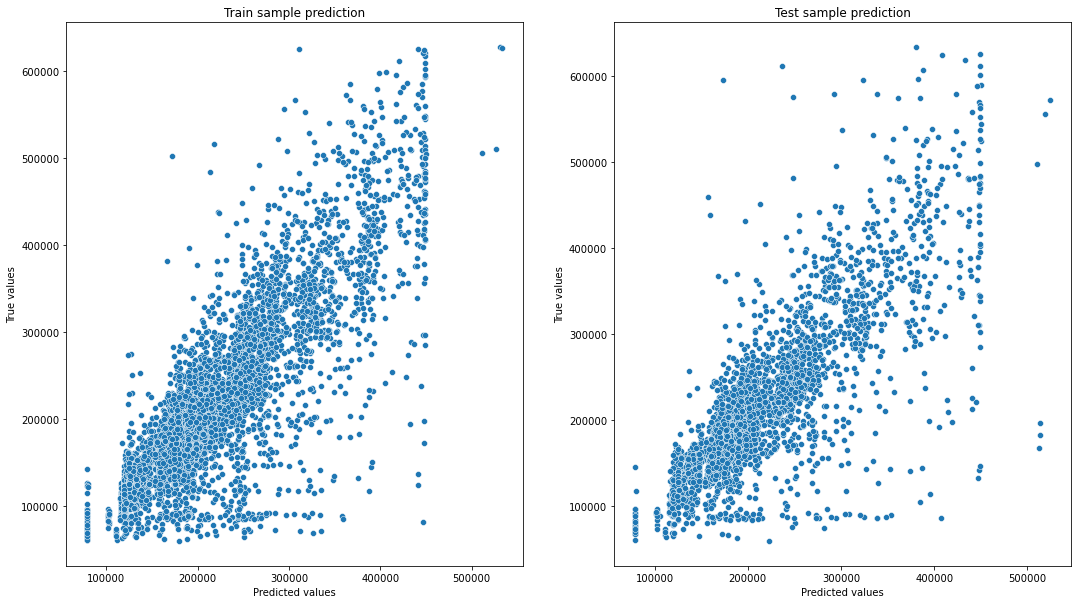

In [115]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)


In [117]:
#Перекрёстная проверка

cv_score = cross_val_score(
    rf_model,
    X.fillna(-9999),
    y, scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score

array([0.68372385, 0.63493075, 0.64407999, 0.67304393, 0.67507457])

In [118]:
cv_score.mean(), cv_score.std()

(0.6621706176983028, 0.019071257523498055)

In [119]:
cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.6430993601748047, 0.6812418752218008)

In [120]:
#Важность признаков
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.437550
0,Rooms,0.156109
11,Social_2,0.138606
10,Social_1,0.107530
12,Social_3,0.054776
7,Ecology_1,0.029053
13,Healthcare_1,0.018162
3,KitchenSquare,0.013733
17,LifeSquarePerRoom,0.011100
6,HouseYear,0.010914


In [125]:

y_test_preds_final = rf_model.predict(test_df[feature_names])
test_id = test_df["Id"]
pred_df = pd.DataFrame()

pred_df["Id"] = test_id
pred_df["Price"] = y_test_preds_final
pred_df.to_csv("./predictions_.csv", index=False)

In [126]:
pred_df = pd.read_csv("./predictions_.csv")

In [130]:
pred_df.shape

(5000, 2)

In [131]:
pred_df.describe()

,Id,Price
count,5000.000000,5000.000000
mean,8412.595400,215574.254981
std,4832.674037,72922.164899
min,1.000000,78960.251440
25%,4221.750000,169089.912028
50%,8320.500000,193585.384836
75%,12598.250000,250807.262357
max,16795.000000,519558.462428
